Dataset path: /Users/vladyoslav/.cache/kagglehub/datasets/rahmasleam/intel-image-dataset/versions/1/Intel Image Dataset
F1 Score: 0.77


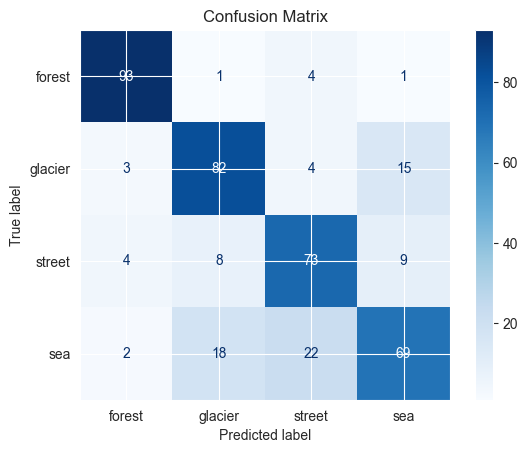

In [6]:
import kagglehub
from src.features import (
    HorizontalEdgeCount,
    VerticalEdgeCount,
    CornerCount,
    GreenPixelPercentage,
    BluePixelPercentage,
    ContrastMeasure,
    TextureComplexity,
    SkyPixelRatio,
    ShadowPresence,
    SymmetryMeasure,
    SharpnessMeasure,
    AverageBrightness,
)
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

# Load dataset
path = os.path.join(
    kagglehub.dataset_download("rahmasleam/intel-image-dataset"), "Intel Image Dataset"
)
print("Dataset path:", path)

categories = ["forest", "glacier", "street", "sea"]
images = []
labels = []

for category in categories:
    category_path = os.path.join(path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            images.append(image)
            labels.append(category)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

# Define features (Assumed functions are implemented elsewhere)
features = [
    HorizontalEdgeCount(),
    VerticalEdgeCount(),
    CornerCount(),
    GreenPixelPercentage(),
    BluePixelPercentage(),
    ContrastMeasure(),
    TextureComplexity(),
    SkyPixelRatio(),
    ShadowPresence(),
    SymmetryMeasure(),
    SharpnessMeasure(),
    AverageBrightness(),
]


def extract_features(image: np.ndarray) -> list:
    return [feature.calculate(image) for feature in features]


# Extract features for each image
X_train_features = [extract_features(image) for image in X_train]
X_test_features = [extract_features(image) for image in X_test]

# Train RandomForest classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_features, y_train)

# Evaluate classifier using F1 score
y_pred = classifier.predict(X_test_features)
f1 = f1_score(y_test, y_pred, average="weighted")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=categories)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()